<a href="https://colab.research.google.com/github/ZainUzama/Adult-Census-income-prediction/blob/main/ML_cw_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Data set and Necessary Libraries**

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

**Descriptive Analysis**

In [ ]:
X['income'] = y
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
X.shape

(48842, 15)

In [ ]:
# Statistical summary
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [ ]:
# Check for null values
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [ ]:
X.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [ ]:
workclass_counts = X['workclass'].value_counts()
print(workclass_counts)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [ ]:
occupation_counts = X['occupation'].value_counts()
print(workclass_counts)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [ ]:
nativeCountry_counts = X['native-country'].value_counts()
print(nativeCountry_counts)

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [ ]:
X['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
X['income'] = X['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'])

In [ ]:
print("Workclass: "+ str((X['workclass'] == '?').sum())+ " records")
print("Occupation: "+ str((X['occupation'] == '?').sum())+ " records")
print("Native-Country: "+ str((X['native-country'] == '?').sum())+ " records")

Workclass: 1836 records
Occupation: 1843 records
Native-Country: 583 records


In [ ]:
# check duplicate rows and and drop those values
duplicateRows = X[X.duplicated()]
duplicateRows.shape

(48, 15)

**Data Preprocessing**

In [ ]:
#Dropping duplicate rows
X= X.drop_duplicates()

In [ ]:
X.shape

(48794, 15)

In [ ]:
X = X.drop(X[X['workclass'] == '?'].index)
X = X.drop(X[X['occupation'] == '?'].index)
X = X.drop(X[X['native-country'] == '?'].index)

In [ ]:
workclass_counts = X['workclass'].value_counts()
print(workclass_counts)

Private             33451
Self-emp-not-inc     3819
Local-gov            3110
State-gov            1962
Self-emp-inc         1652
Federal-gov          1415
Without-pay            21
Never-worked            3
Name: workclass, dtype: int64


In [ ]:
occupation_counts = X['occupation'].value_counts()
print(occupation_counts)

Prof-specialty       6063
Craft-repair         6033
Exec-managerial      6008
Adm-clerical         5557
Sales                5435
Other-service        4837
Machine-op-inspct    2981
Transport-moving     2330
Handlers-cleaners    2051
Farming-fishing      1480
Tech-support         1429
Protective-serv       977
Priv-house-serv       234
Armed-Forces           15
Name: occupation, dtype: int64


In [ ]:
nativeCountry_counts = X['native-country'].value_counts()
print(nativeCountry_counts)

United-States                 42130
Mexico                          910
Philippines                     284
Germany                         197
Puerto-Rico                     179
Canada                          168
India                           151
El-Salvador                     149
Cuba                            135
England                         123
China                           115
South                           106
Jamaica                         105
Dominican-Republic              100
Italy                           100
Japan                            89
Guatemala                        85
Vietnam                          83
Poland                           83
Columbia                         82
Haiti                            73
Portugal                         64
Iran                             58
Taiwan                           56
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [ ]:
#Grouping work class
X['workclass'] = X['workclass'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'Government')
X['workclass'] = X['workclass'].replace(['Self-emp-inc', 'Self-emp-not-inc'], 'Self-Employed')
X['workclass'] = X['workclass'].replace(['Without-pay', 'Never-worked'], 'Unemployed')

#Grouping martial status
X['marital-status'] = X['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Separated', 'Married-spouse-absent'], 'Married')
X['marital-status'] = X['marital-status'].replace(['Never-married', 'Divorced', 'Widowed'], 'Not Married')

#Grouping occupation
X['occupation'] = X['occupation'].replace(['Prof-specialty', 'Exec-managerial'], 'Professional')
X['occupation'] = X['occupation'].replace(['Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Protective-serv', 'Tech-support'], 'Service')
X['occupation'] = X['occupation'].replace(['Sales', 'Craft-repair'], 'Sales')
X['occupation'] = X['occupation'].replace(['Other-service', 'Armed-Forces', 'Priv-house-serv'], 'Others')

In [ ]:
X['workclass'].value_counts()

Private          33451
Government        6487
Self-Employed     5471
Unemployed          24
Name: workclass, dtype: int64

In [ ]:
X['marital-status'].value_counts()

Married        23514
Not Married    22882
Name: marital-status, dtype: int64

In [ ]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Government,77516,Bachelors,13,Not Married,Service,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-Employed,83311,Bachelors,13,Married,Professional,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Not Married,Service,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married,Service,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
X = X.drop('education', axis = 1)#education number and Education makes the same impact on the data

In [ ]:
X.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Government,77516,13,Not Married,Service,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-Employed,83311,13,Married,Professional,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Not Married,Service,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married,Service,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# check duplicate rows and and drop those values
duplicateRows = X[X.duplicated()]
duplicateRows.shape

(33, 14)

In [ ]:
X.shape

(46396, 14)

In [ ]:
X= X.drop_duplicates()

In [ ]:
X.shape

(46363, 14)

In [ ]:
income_counts = X['income'].value_counts()
print(income_counts)

<=50K    35018
>50K     11345
Name: income, dtype: int64


**Data Visualization**

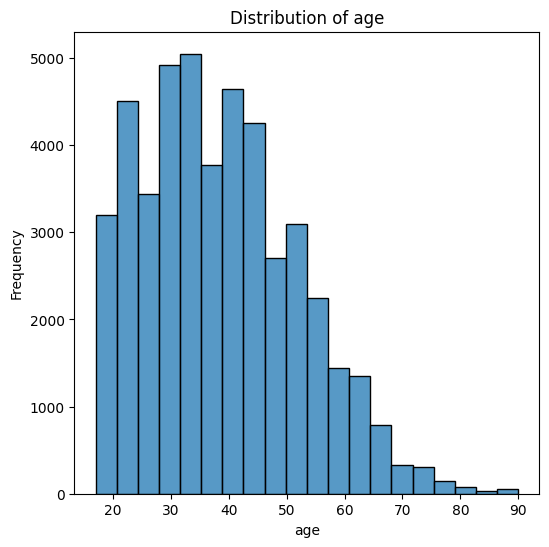

In [ ]:
variable = 'age'
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(X[variable], bins=20,ax=ax)
ax.set_title(f'Distribution of {variable}')
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')
plt.show()

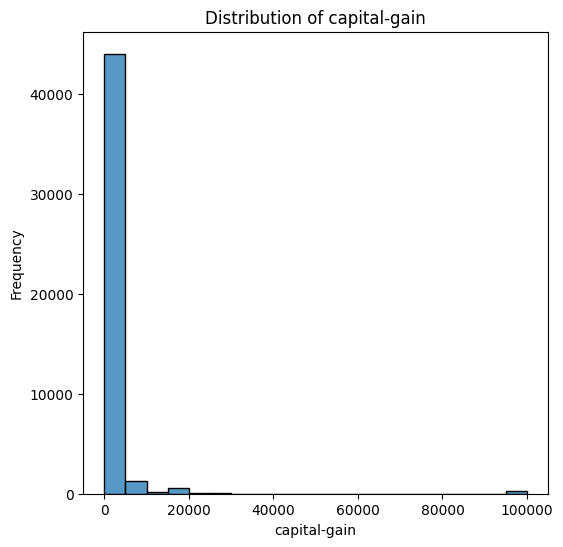

In [ ]:
variable = 'capital-gain'
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(X[variable], bins=20, ax=ax)
ax.set_title(f'Distribution of {variable}')
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')
plt.show()

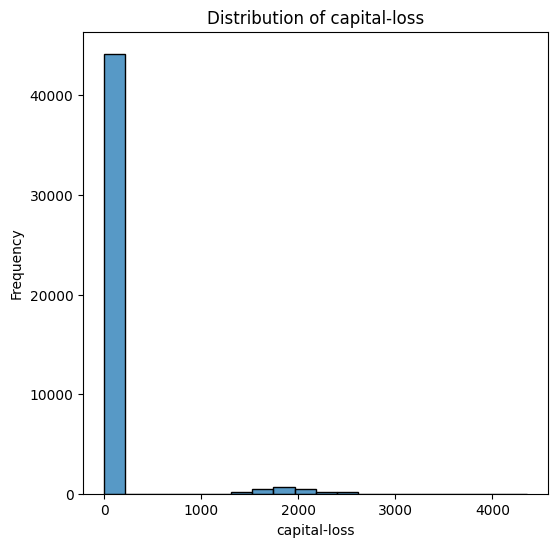

In [ ]:
variable = 'capital-loss'
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(X[variable], bins=20, ax=ax)
ax.set_title(f'Distribution of {variable}')
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')
plt.show()

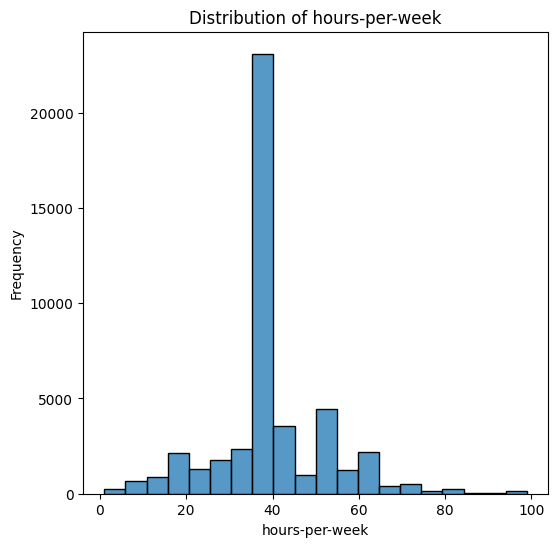

In [ ]:
variable = 'hours-per-week'
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(X[variable], bins=20, ax=ax)
ax.set_title(f'Distribution of {variable}')
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')
plt.show()

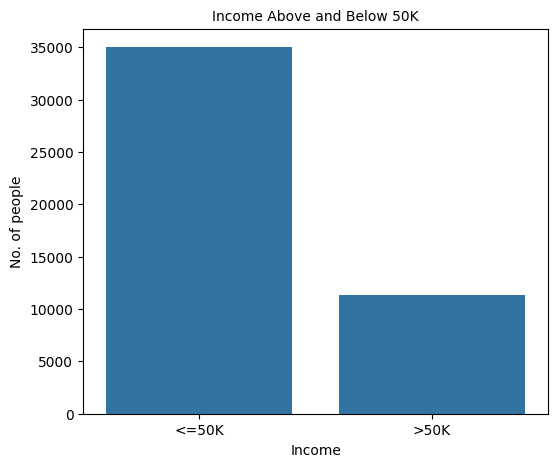

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(6,5))
sns.countplot(data = X, x='income')
plt.title('Income Above and Below 50K',fontsize=10)
plt.xlabel('Income',fontsize=10)
plt.ylabel('No. of people',fontsize=10)
plt.show()

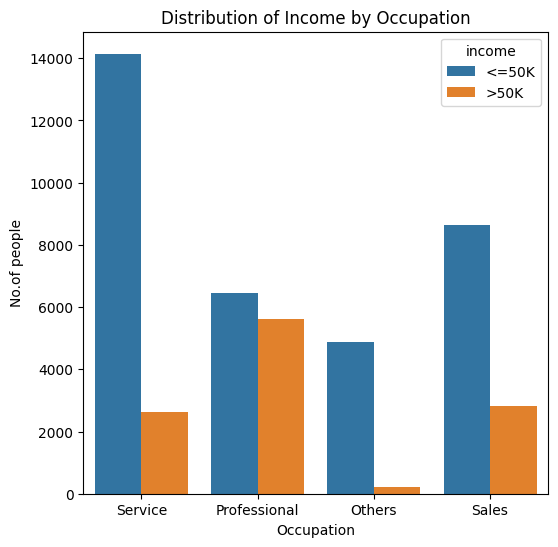

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(6,6))
sns.countplot(data=X,x='occupation',hue='income')
plt.title('Distribution of Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('No.of people')
plt.show()

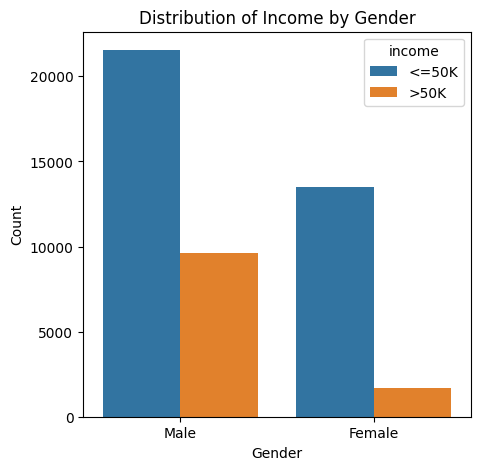

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=X, x='sex', hue='income')
plt.title('Distribution of Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

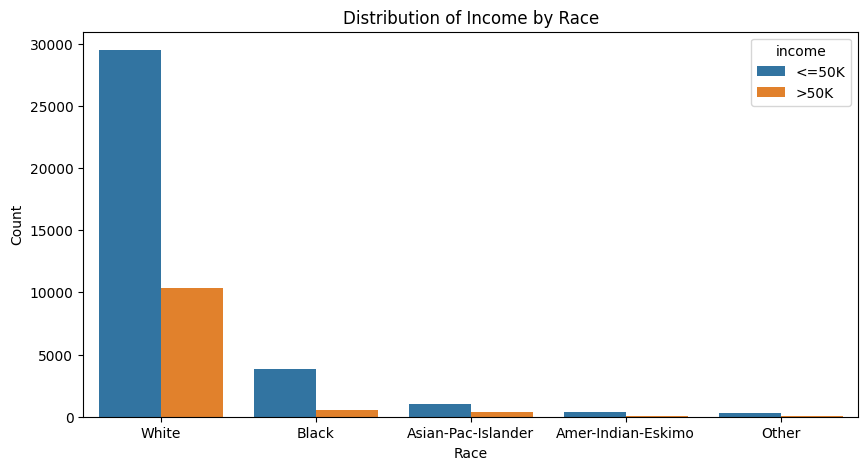

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=X, x='race', hue='income')
plt.title('Distribution of Income by Race')
plt.xlabel('Race')
plt.ylabel('Count')

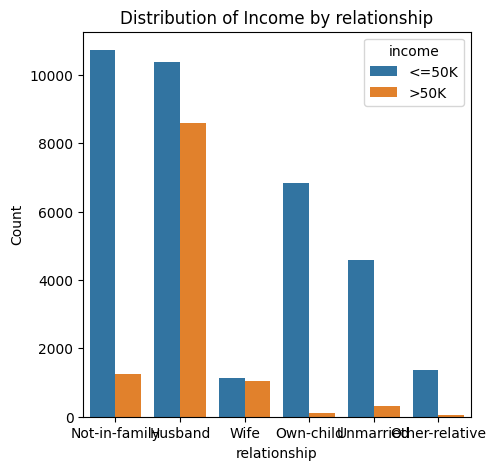

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=X, x='relationship', hue='income')
plt.title('Distribution of Income by relationship')
plt.xlabel('relationship')
plt.ylabel('Count')
plt.show()

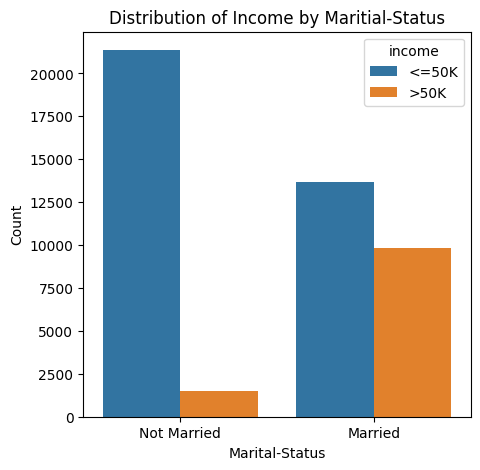

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=X, x='marital-status', hue='income')
plt.title('Distribution of Income by Maritial-Status')
plt.xlabel('Marital-Status')
plt.ylabel('Count')
plt.show()

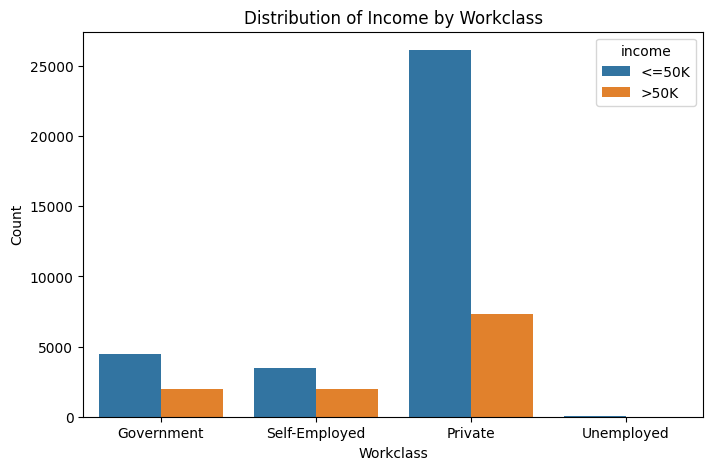

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=X, x='workclass', hue='income')
plt.title('Distribution of Income by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

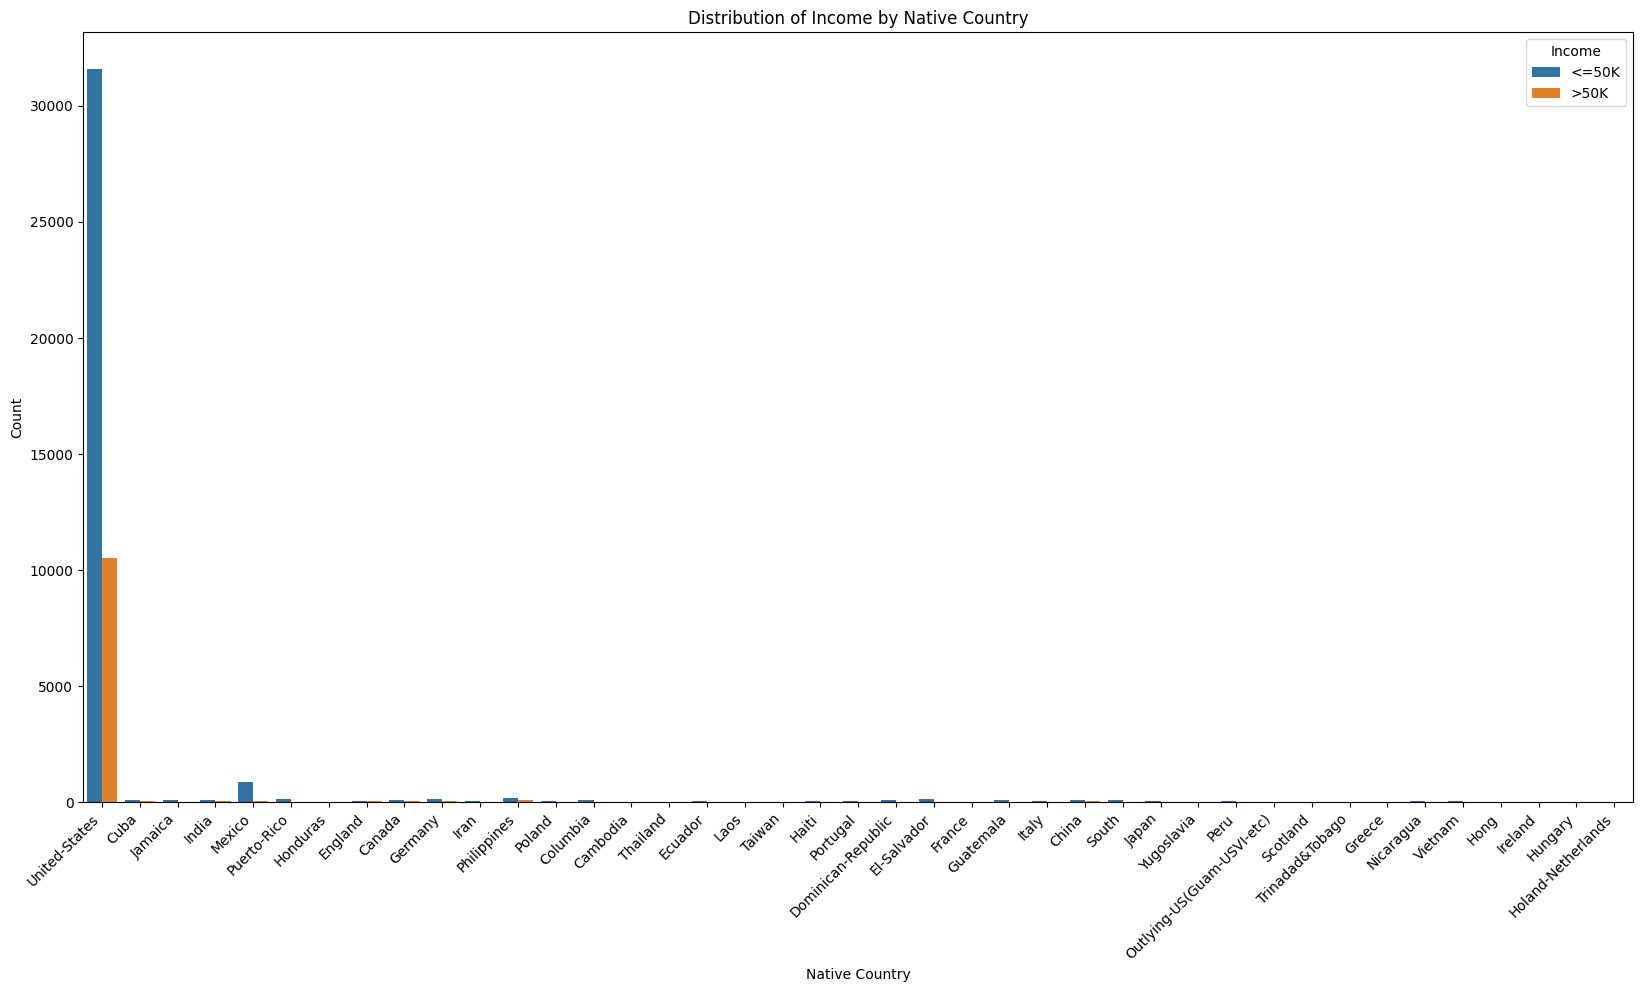

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=X, x='native-country', hue='income')
plt.title('Distribution of Income by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right')
plt.show()

In [ ]:
lbl_encode = LabelEncoder()

In [ ]:
categ = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Encode Categorical Columns
le = LabelEncoder()
X[categ] = X[categ].apply(le.fit_transform)

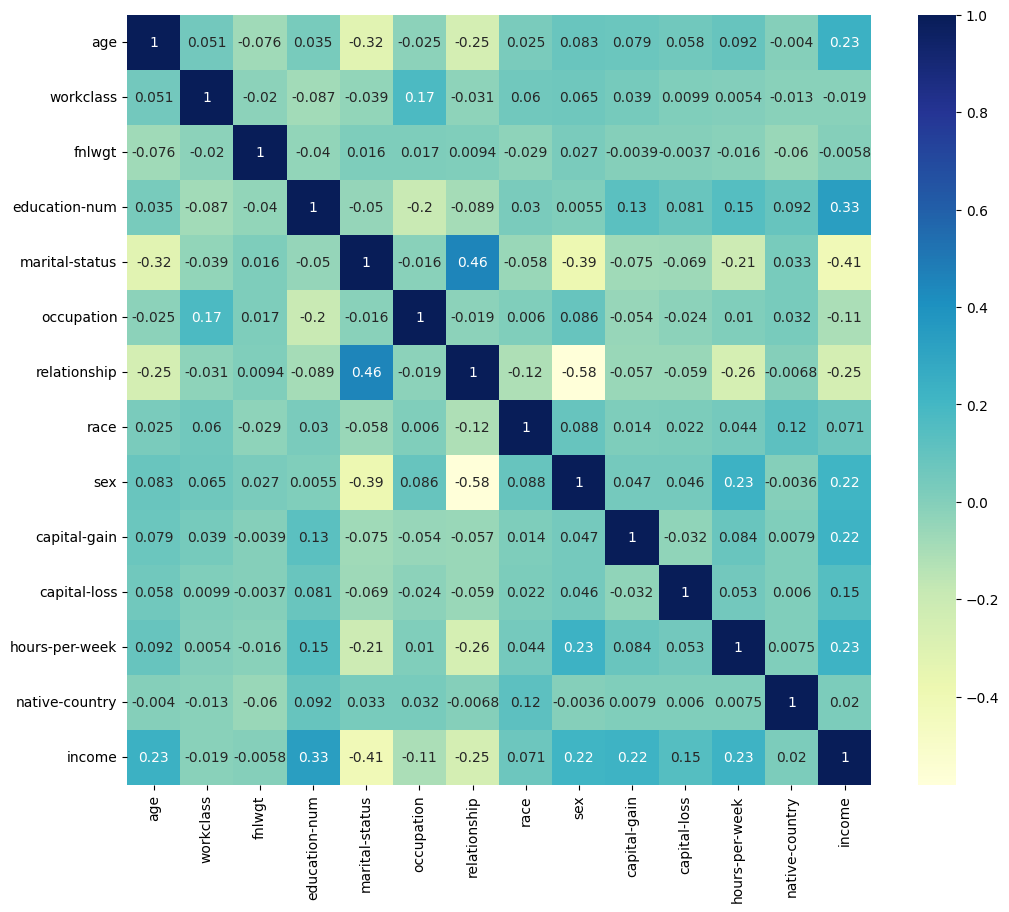

In [ ]:
# corelation between attributes
plt.figure(figsize=(12, 10))
dataplot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

In [ ]:
print(X['fnlwgt'].corr(X['income']))#correlation coefficient close to zero suggests a weak linear relationship

-0.0057769254630813975


In [ ]:
X = X.drop('fnlwgt', axis = 1)

In [ ]:
X.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,13,1,3,1,4,1,2174,0,40,38,0
1,50,2,13,0,1,0,4,1,0,0,13,38,0
2,38,1,9,1,3,1,4,1,0,0,40,38,0
3,53,1,7,0,3,0,2,1,0,0,40,38,0
4,28,1,13,0,1,5,2,0,0,0,40,4,0


In [ ]:
X.shape

(46363, 13)

**Splitting data in to Training and Testing**

In [ ]:
x= X.drop((['income']), axis=1)
y=X['income']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
y_train.value_counts()

0    24506
1     7948
Name: income, dtype: int64

In [ ]:
#handling the data imbalance
smote = SMOTE()
x_tarin_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print(x_tarin_smote.shape, y_train_smote.shape)

(49012, 12) (49012,)


In [ ]:
y_train_smote.value_counts()

0    24506
1    24506
Name: income, dtype: int64

**Evaluation**


In [ ]:
def training_score(y_act, y_pred):
  acc = round(accuracy_score(y_act, y_pred), 3)
  pr = round(precision_score(y_act, y_pred), 3)
  rec = round(recall_score(y_act, y_pred), 3)
  f1 = round(f1_score(y_act, y_pred), 3)
  print(f'Training Score : \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score= {f1}')

def validation_score(y_act, y_pred):
  acc = round(accuracy_score(y_act, y_pred), 3)
  pr = round(precision_score(y_act, y_pred), 3)
  rec = round(recall_score(y_act, y_pred), 3)
  f1 = round(f1_score(y_act, y_pred), 3)
  print(f'Testing Score : \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score= {f1}')

**Naive Bayes**

In [ ]:
gb = GaussianNB()
gb.fit(x_tarin_smote,y_train_smote)

GaussianNB()

In [ ]:
y_train_pred = gb.predict(x_tarin_smote)

In [ ]:
training_score(y_train_smote, y_train_pred)

Training Score : 
	Accuracy = 0.698
	Precision = 0.874
	Recall = 0.462
	F1-Score= 0.604


In [ ]:
y_test.shape

(13909,)

In [ ]:
y_test_pred_nb = gb.predict(x_test)

In [ ]:
validation_score(y_test, y_test_pred_nb)

Testing Score : 
	Accuracy = 0.814
	Precision = 0.688
	Recall = 0.44
	F1-Score= 0.536


In [ ]:
# Check if the column 'income' exists in the DataFrame before getting its value counts
value_counts_column = y_test.value_counts()
print("Value counts for 'income':")
print(value_counts_column)
# Iterate over all columns in the DataFrame and print their value counts
for column in x_test.columns:
    value_counts = x_test[column].value_counts()
    print(f"Value counts for '{column}':")
    print(value_counts)


Value counts for 'income':
0    10512
1     3397
Name: income, dtype: int64
Value counts for 'age':
36    417
33    388
37    387
32    387
31    383
     ... 
84      6
82      4
83      3
88      3
85      2
Name: age, Length: 71, dtype: int64
Value counts for 'workclass':
1    10014
0     1987
2     1608
4      288
3       12
Name: workclass, dtype: int64
Value counts for 'education-num':
9     4568
10    2991
13    2320
14     782
11     583
7      528
12     449
6      392
4      262
15     236
5      210
8      188
16     159
3      157
2       63
1       21
Name: education-num, dtype: int64
Value counts for 'marital-status':
0    7008
1    6901
Name: marital-status, dtype: int64
Value counts for 'occupation':
3    4984
1    3607
2    3494
0    1533
4     291
Name: occupation, dtype: int64
Value counts for 'relationship':
0    5661
1    3610
3    2115
4    1478
5     642
2     403
Name: relationship, dtype: int64
Value counts for 'race':
4    12014
2     1279
1      389
0      12

In [ ]:
print(classification_report(y_test, y_test_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88     10512
           1       0.69      0.44      0.54      3397

    accuracy                           0.81     13909
   macro avg       0.76      0.69      0.71     13909
weighted avg       0.80      0.81      0.80     13909



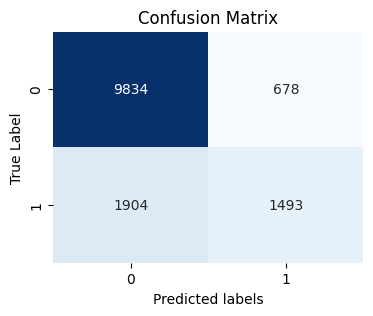

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred_nb)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap ='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Random Forest**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred = rfc.predict(x_tarin_smote)

In [ ]:
training_score(y_train_smote, y_train_pred)

Training Score : 
	Accuracy = 0.893
	Precision = 0.977
	Recall = 0.804
	F1-Score= 0.882


In [ ]:
y_test_pred_rfc = rfc.predict(x_test)

In [ ]:
validation_score(y_test, y_test_pred_rfc)

Testing Score : 
	Accuracy = 0.847
	Precision = 0.719
	Recall = 0.612
	F1-Score= 0.661


In [ ]:
print(classification_report(y_test, y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10512
           1       0.72      0.61      0.66      3397

    accuracy                           0.85     13909
   macro avg       0.80      0.77      0.78     13909
weighted avg       0.84      0.85      0.84     13909



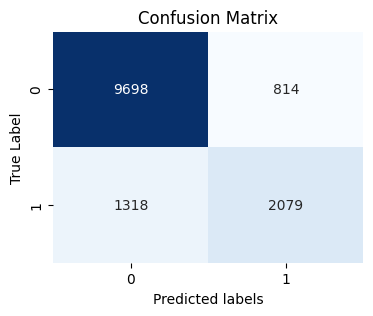

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred_rfc)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap ='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()